<a href="https://colab.research.google.com/github/JingzhiZhou/Kiana-Project/blob/main/regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/3 x Zones Group Assignment/csv_remove device data/tps1_2_block89.csv")
df

,Building,Level,MAC,LAT,LNG,Time,Date,block
0,TPS1,Level 2,48:49:c7:12:a4:00,-22.811847,-43.250148,00:00:30.477,2019-08-12,block3
1,TPS1,Level 2,c0:8c:71:2c:79:f9,-22.811774,-43.250828,00:00:31.272,2019-08-12,block3
2,TPS1,Level 2,60:1d:91:04:cf:56,-22.811858,-43.249975,00:00:32.489,2019-08-12,block3
3,TPS1,Level 2,48:49:c7:12:a4:00,-22.811849,-43.250092,00:00:40.493,2019-08-12,block3
4,TPS1,Level 2,c0:8c:71:2c:79:f9,-22.811753,-43.250714,00:00:41.285,2019-08-12,block3
...,...,...,...,...,...,...,...,...
1362866,TPS1,Level 2,dc:35:f1:be:1c:a3,-22.812054,-43.250710,23:59:56.141,2019-09-08,block3
1362867,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812081,-43.250579,23:59:56.333,2019-09-08,block3
1362868,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812081,-43.250579,23:59:56.334,2019-09-08,block3
1362869,TPS1,Level 2,38:9a:f6:55:65:93,-22.812055,-43.250710,23:59:56.339,2019-09-08,block3


In [ ]:
df['hour'] = df.Time.astype(str).str[:2]
df['hour']=df['hour'].replace(['00','01','02','03','04','05','06','23','24'],'0')
df['hour']=df['hour'].replace(['07','08','09','10','15','16','17','21','22'],'1')
df['hour']=df['hour'].replace(['11','12','13','14','18','19','20'],'2')
df['weekday'] =  df.Date.astype(str).str[-2:]
df['weekday'] =  df['weekday'].replace(['12','13','14','15','16','19','20','21','22','23','26','27','28','29','30','02','03','04','05','06'],'1')
df['weekday'] =  df['weekday'].replace(['17','18','24','25','31','01','07','08'],'0')
df

,Building,Level,MAC,LAT,LNG,Time,Date,block,hour,weekday
0,TPS1,Level 2,48:49:c7:12:a4:00,-22.811847,-43.250148,00:00:30.477,2019-08-12,block3,0,1
1,TPS1,Level 2,c0:8c:71:2c:79:f9,-22.811774,-43.250828,00:00:31.272,2019-08-12,block3,0,1
2,TPS1,Level 2,60:1d:91:04:cf:56,-22.811858,-43.249975,00:00:32.489,2019-08-12,block3,0,1
3,TPS1,Level 2,48:49:c7:12:a4:00,-22.811849,-43.250092,00:00:40.493,2019-08-12,block3,0,1
4,TPS1,Level 2,c0:8c:71:2c:79:f9,-22.811753,-43.250714,00:00:41.285,2019-08-12,block3,0,1
...,...,...,...,...,...,...,...,...,...,...
1362866,TPS1,Level 2,dc:35:f1:be:1c:a3,-22.812054,-43.250710,23:59:56.141,2019-09-08,block3,0,0
1362867,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812081,-43.250579,23:59:56.333,2019-09-08,block3,0,0
1362868,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812081,-43.250579,23:59:56.334,2019-09-08,block3,0,0
1362869,TPS1,Level 2,38:9a:f6:55:65:93,-22.812055,-43.250710,23:59:56.339,2019-09-08,block3,0,0


In [ ]:
df.hour.unique()

array(['0', '1', '2'], dtype=object)

In [ ]:
df.weekday.unique()

array(['1', '0'], dtype=object)

In [ ]:
count = df.groupby(['weekday','hour'])['MAC'].nunique()
count = pd.DataFrame({'counts':count})
count.reset_index(inplace=True)
count

,weekday,hour,counts
0,0,0,7896
1,0,1,24522
2,0,2,19430
3,1,0,12246
4,1,1,35871
5,1,2,29248


In [ ]:
count['weekday'] = count['weekday'].astype(object)
count['hour'] = count['hour'].astype(object)

In [ ]:
m1 = smf.ols(formula = 'counts ~ weekday+hour',data = count).fit() 
m1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 counts   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     26.45
Date:                Fri, 23 Apr 2021   Prob (F-statistic):             0.0366
Time:                        04:52:29   Log-Likelihood:                -52.401
No. Observations:                   6   AIC:                             112.8
Df Residuals:                       2   BIC:                             112.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5818.1667   2124.317      2.739      0.111   -3322.030     1.5e+04
weekday[T.1]  8505.6667   2124.317      4.004      0.057    -634.530    1.76e+04
hour[T.1]     2.013e+04   2601.746      7.735      0.016    8931.091    3.13e+04
hour[T.2]     1.427e+04   2601.746      5.484      0.032    3073.591    2.55e+04
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.045
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.563
Skew:                           0.000   Prob(JB):                        0.755
Kurtosis:                       1.500   Cond. No.                         4.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
hour=count.hour
weekday=count.weekday
counts = count.counts

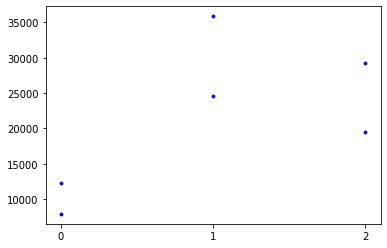

In [ ]:
plt.scatter(hour,counts,color='b',s=8)

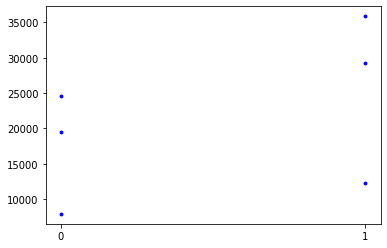

In [ ]:
plt.scatter(weekday,counts,color='b',s=8)

In [ ]:
df1 = pd.read_csv('/content/gdrive/MyDrive/3 x Zones Group Assignment/csv_remove device data/tps1_2_9test_block.csv')
df1

,Building,Level,MAC,LAT,LNG,Time,Date,block
0,TPS1,Level 2,10:d0:7a:53:0a:f6,-22.811919,-43.250153,00:00:01.16,2019-09-09,block3
1,TPS1,Level 2,10:d0:7a:53:0a:f6,-22.811919,-43.250153,00:00:01.16,2019-09-09,block3
2,TPS1,Level 2,dc:35:f1:be:1c:a3,-22.812060,-43.250705,00:00:06.119,2019-09-09,block3
3,TPS1,Level 2,dc:35:f1:be:1c:a3,-22.812060,-43.250705,00:00:06.119,2019-09-09,block3
4,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812084,-43.250550,00:00:06.312,2019-09-09,block3
...,...,...,...,...,...,...,...,...
369565,TPS1,Level 2,80:ce:62:aa:a5:5f,-22.811778,-43.250796,23:59:50.195,2019-09-15,block3
369566,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812055,-43.250609,23:59:55.329,2019-09-15,block3
369567,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812055,-43.250609,23:59:55.329,2019-09-15,block3
369568,TPS1,Level 2,cc:b8:a8:fd:0f:50,-22.811922,-43.250145,23:59:57.095,2019-09-15,block3


In [ ]:
df1['hour'] = df1.Time.astype(str).str[:2]
df1['hour']=df1['hour'].replace(['00','01','02','03','04','05','06','23','24'],'0')
df1['hour']=df1['hour'].replace(['07','08','09','10','15','16','17','21','22'],'1')
df1['hour']=df1['hour'].replace(['11','12','13','14','18','19','20'],'2')
df1['weekday'] =  df1.Date.astype(str).str[-2:]
df1['weekday'] =  df1['weekday'].replace(['09','10','11','12','13'],'1')
df1['weekday'] =  df1['weekday'].replace(['14','15'],'0')
df1

,Building,Level,MAC,LAT,LNG,Time,Date,block,hour,weekday
0,TPS1,Level 2,10:d0:7a:53:0a:f6,-22.811919,-43.250153,00:00:01.16,2019-09-09,block3,0,1
1,TPS1,Level 2,10:d0:7a:53:0a:f6,-22.811919,-43.250153,00:00:01.16,2019-09-09,block3,0,1
2,TPS1,Level 2,dc:35:f1:be:1c:a3,-22.812060,-43.250705,00:00:06.119,2019-09-09,block3,0,1
3,TPS1,Level 2,dc:35:f1:be:1c:a3,-22.812060,-43.250705,00:00:06.119,2019-09-09,block3,0,1
4,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812084,-43.250550,00:00:06.312,2019-09-09,block3,0,1
...,...,...,...,...,...,...,...,...,...,...
369565,TPS1,Level 2,80:ce:62:aa:a5:5f,-22.811778,-43.250796,23:59:50.195,2019-09-15,block3,0,0
369566,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812055,-43.250609,23:59:55.329,2019-09-15,block3,0,0
369567,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812055,-43.250609,23:59:55.329,2019-09-15,block3,0,0
369568,TPS1,Level 2,cc:b8:a8:fd:0f:50,-22.811922,-43.250145,23:59:57.095,2019-09-15,block3,0,0


In [ ]:
df1.hour.unique()

array(['0', '1', '2'], dtype=object)

In [ ]:
df1.weekday.unique()

array(['1', '0'], dtype=object)

In [ ]:
count1 = df1.groupby(['weekday','hour'])['MAC'].nunique()
count1 = pd.DataFrame({'counts':count1})
count1.reset_index(inplace=True)
count1

,weekday,hour,counts
0,0,0,1829
1,0,1,7043
2,0,2,5117
3,1,0,5437
4,1,1,15343
5,1,2,10361


In [ ]:
test = count1[['weekday', 'hour']]
test

,weekday,hour
0,0,0
1,0,1
2,0,2
3,1,0
4,1,1
5,1,2


In [ ]:
preds = m1.predict(test)
preds = preds/4

In [ ]:
count1["pred"] = preds

In [ ]:
count1

,weekday,hour,counts,pred
0,0,0,1829,1454.541667
1,0,1,7043,6485.916667
2,0,2,5117,5021.541667
3,1,0,5437,3580.958333
4,1,1,15343,8612.333333
5,1,2,10361,7147.958333


In [ ]:
y = count1['counts']

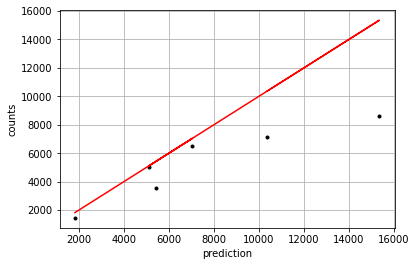

In [ ]:
plt.scatter(y,preds,s=9,color='k') 
plt.plot(count1['counts'],y,color='r') 
plt.ylabel('counts') 
plt.xlabel('prediction')
plt.grid()

hour changed

In [ ]:
df['hour'] = df.Time.astype(str).str[:2]
df['hour']=df['hour'].replace(['00','01','02','03','04','05','06','23'],'0')
df['hour']=df['hour'].replace(['07','08','09','10','15','16','17','21','22'],'1')
df['hour']=df['hour'].replace(['11','12','13','14','18','19','20'],'2')
df['weekday'] =  df.Date.astype(str).str[-2:]
df['weekday'] = df['weekday'].replace(['12','19','26','02'],'1')
df['weekday'] = df['weekday'].replace(['13','20','27','03'],'2')
df['weekday'] = df['weekday'].replace(['14','21','28','04'],'3')
df['weekday'] = df['weekday'].replace(['15','22','29','05'],'4')
df['weekday'] = df['weekday'].replace(['16','23','30','06'],'5')
df['weekday'] = df['weekday'].replace(['17','24','31','07'],'6')
df['weekday'] = df['weekday'].replace(['18','25','01','08'],'7')
df

,Building,Level,MAC,LAT,LNG,Time,Date,block,hour,weekday
0,TPS1,Level 2,48:49:c7:12:a4:00,-22.811847,-43.250148,00:00:30.477,2019-08-12,block3,0,1
1,TPS1,Level 2,c0:8c:71:2c:79:f9,-22.811774,-43.250828,00:00:31.272,2019-08-12,block3,0,1
2,TPS1,Level 2,60:1d:91:04:cf:56,-22.811858,-43.249975,00:00:32.489,2019-08-12,block3,0,1
3,TPS1,Level 2,48:49:c7:12:a4:00,-22.811849,-43.250092,00:00:40.493,2019-08-12,block3,0,1
4,TPS1,Level 2,c0:8c:71:2c:79:f9,-22.811753,-43.250714,00:00:41.285,2019-08-12,block3,0,1
...,...,...,...,...,...,...,...,...,...,...
1362866,TPS1,Level 2,dc:35:f1:be:1c:a3,-22.812054,-43.250710,23:59:56.141,2019-09-08,block3,0,7
1362867,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812081,-43.250579,23:59:56.333,2019-09-08,block3,0,7
1362868,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812081,-43.250579,23:59:56.334,2019-09-08,block3,0,7
1362869,TPS1,Level 2,38:9a:f6:55:65:93,-22.812055,-43.250710,23:59:56.339,2019-09-08,block3,0,7


In [ ]:
df.hour.unique()

array(['0', '1', '2'], dtype=object)

In [ ]:
df.weekday.unique()

array(['1', '2', '3', '4', '5', '6', '7'], dtype=object)

In [ ]:
count2 = df.groupby(['weekday','hour'])['MAC'].nunique()
count2 = pd.DataFrame({'counts':count2/4})
count2.reset_index(inplace=True)
count2

,weekday,hour,counts
0,1,0,595.50
1,1,1,1749.00
2,1,2,1265.00
3,2,0,676.25
4,2,1,2039.00
5,2,2,1810.75
6,3,0,789.50
7,3,1,1954.75
8,3,2,1477.25
9,4,0,603.50


In [ ]:
count2['weekday'] = count2['weekday'].astype(object)
count2['hour'] = count2['hour'].astype(object)

In [ ]:
m2 = smf.ols(formula = 'counts ~ weekday+hour',data = count2).fit() 
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 counts   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     17.68
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           1.56e-05
Time:                        17:52:46   Log-Likelihood:                -144.02
No. Observations:                  21   AIC:                             306.0
Df Residuals:                      12   BIC:                             315.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      332.3333    199.421      1.666      0.121    -102.169     766.835
weekday[T.2]   305.5000    248.722      1.228      0.243    -236.419     847.419
weekday[T.3]   204.0000    248.722      0.820      0.428    -337.919     745.919
weekday[T.4]   159.7500    248.722      0.642      0.533    -382.169     701.669
weekday[T.5]   588.6667    248.722      2.367      0.036      46.748    1130.586
weekday[T.6]   563.2500    248.722      2.265      0.043      21.331    1105.169
weekday[T.7]  1481.5000    248.722      5.956      0.000     939.581    2023.419
hour[T.1]     1542.1429    162.827      9.471      0.000    1187.374    1896.912
hour[T.2]     1070.3571    162.827      6.574      0.000     715.588    1425.126
==============================================================================
Omnibus:                        7.318   Durbin-Watson:                   2.569
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                5.844
Skew:                          -0.658   Prob(JB):                       0.0538
Kurtosis:                       5.224   Cond. No.                         8.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
count2['hour'].shape

(21,)

In [ ]:
weekday1 = count2['weekday'].values.reshape(-1,1)
hour1 = count2['hour'].values.reshape(-1,1)
poly = PolynomialFeatures(degree=2)
weekday2 = poly.fit_transform(weekday1)
hour2 = poly.fit_transform(hour1)

In [ ]:
m2 = smf.ols(formula = 'counts ~ weekday2+hour2',data = count2).fit() 
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 counts   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     28.60
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           4.12e-07
Time:                        17:52:37   Log-Likelihood:                -148.75
No. Observations:                  21   AIC:                             307.5
Df Residuals:                      16   BIC:                             312.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     222.6111    104.771      2.125      0.050       0.506     444.716
weekday2[0]   222.6111    104.771      2.125      0.050       0.506     444.716
weekday2[1]  -227.2619    170.385     -1.334      0.201    -588.463     133.939
weekday2[2]    52.2679     20.816      2.511      0.023       8.140      96.396
hour2[0]      222.6111    104.771      2.125      0.050       0.506     444.716
hour2[1]     2549.1071    318.422      8.005      0.000    1874.083    3224.132
hour2[2]    -1006.9643    152.965     -6.583      0.000   -1331.236    -682.693
==============================================================================
Omnibus:                        0.589   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.476
Skew:                           0.332   Prob(JB):                        0.788
Kurtosis:                       2.678   Cond. No.                     2.74e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.94e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
tests = count2[['weekday', 'hour']]
tests

,weekday,hour
0,1,0
1,1,1
2,1,2
3,2,0
4,2,1
5,2,2
6,3,0
7,3,1
8,3,2
9,4,0


In [ ]:
pred2 = m2.predict(tests)
pred2 =  pred2

In [ ]:
count2["pred"] = pred2
count2

,weekday,hour,counts,pred
0,1,0,595.50,332.333333
1,1,1,1749.00,1874.476190
2,1,2,1265.00,1402.690476
3,2,0,676.25,637.833333
4,2,1,2039.00,2179.976190
5,2,2,1810.75,1708.190476
6,3,0,789.50,536.333333
7,3,1,1954.75,2078.476190
8,3,2,1477.25,1606.690476
9,4,0,603.50,492.083333


In [ ]:
count2['diff'] = count2['counts'] - count2['pred']

In [ ]:
count2['upper'] = count2['pred'] + 2000

In [ ]:
count2['lower'] =100

In [ ]:
count2

,weekday,hour,counts,pred,diff,upper,lower
0,1,0,595.50,332.333333,263.166667,2595.50,100
1,1,1,1749.00,1874.476190,-125.476190,3749.00,100
2,1,2,1265.00,1402.690476,-137.690476,3265.00,100
3,2,0,676.25,637.833333,38.416667,2676.25,100
4,2,1,2039.00,2179.976190,-140.976190,4039.00,100
5,2,2,1810.75,1708.190476,102.559524,3810.75,100
6,3,0,789.50,536.333333,253.166667,2789.50,100
7,3,1,1954.75,2078.476190,-123.726190,3954.75,100
8,3,2,1477.25,1606.690476,-129.440476,3477.25,100
9,4,0,603.50,492.083333,111.416667,2603.50,100


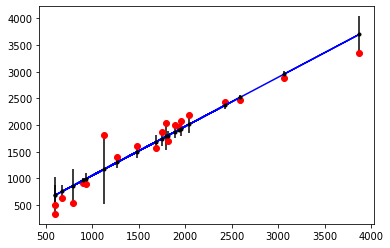

In [ ]:
x = count2.counts
y = count2.pred

coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)

plt.plot(x, y, 'ro', x, poly1d_fn(x), '-b')
plt.errorbar(x, poly1d_fn(x), yerr=poly1d_fn(x) - y, fmt='.k')
plt.show()

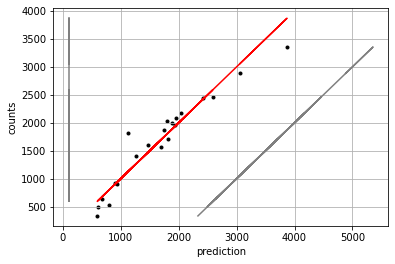

In [ ]:
plt.scatter(x,y,s=9,color='k') 
plt.plot(count2['counts'],x,color='r')
plt.plot(count2['upper'],y,color='grey')
plt.plot(count2['lower'],x,color='grey') 
plt.ylabel('counts') 
plt.xlabel('prediction')
plt.grid()

Test

In [ ]:
df1['hour'] = df1.Time.astype(str).str[:2]
df1['hour']=df1['hour'].replace(['00','01','02','03','04','05','06','23'],'0') ## 去掉24
df1['hour']=df1['hour'].replace(['07','08','09','10','15','16','17','21','22'],'1')
df1['hour']=df1['hour'].replace(['11','12','13','14','18','19','20'],'2')
df1['weekday'] =  df1.Date.astype(str).str[-2:]
df1['weekday'] = df1['weekday'].replace(['09'],'1')
df1['weekday'] = df1['weekday'].replace(['10'],'2')
df1['weekday'] = df1['weekday'].replace(['11'],'3')
df1['weekday'] = df1['weekday'].replace(['12'],'4')
df1['weekday'] = df1['weekday'].replace(['13'],'5')
df1['weekday'] = df1['weekday'].replace(['14'],'6')
df1['weekday'] = df1['weekday'].replace(['15'],'7')
df1

,Building,Level,MAC,LAT,LNG,Time,Date,block,hour,weekday
0,TPS1,Level 2,10:d0:7a:53:0a:f6,-22.811919,-43.250153,00:00:01.16,2019-09-09,block3,0,1
1,TPS1,Level 2,10:d0:7a:53:0a:f6,-22.811919,-43.250153,00:00:01.16,2019-09-09,block3,0,1
2,TPS1,Level 2,dc:35:f1:be:1c:a3,-22.812060,-43.250705,00:00:06.119,2019-09-09,block3,0,1
3,TPS1,Level 2,dc:35:f1:be:1c:a3,-22.812060,-43.250705,00:00:06.119,2019-09-09,block3,0,1
4,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812084,-43.250550,00:00:06.312,2019-09-09,block3,0,1
...,...,...,...,...,...,...,...,...,...,...
369565,TPS1,Level 2,80:ce:62:aa:a5:5f,-22.811778,-43.250796,23:59:50.195,2019-09-15,block3,0,7
369566,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812055,-43.250609,23:59:55.329,2019-09-15,block3,0,7
369567,TPS1,Level 2,e0:37:bf:da:68:b0,-22.812055,-43.250609,23:59:55.329,2019-09-15,block3,0,7
369568,TPS1,Level 2,cc:b8:a8:fd:0f:50,-22.811922,-43.250145,23:59:57.095,2019-09-15,block3,0,7


In [ ]:
df1.hour.unique()

array(['0', '1', '2'], dtype=object)

In [ ]:
df1.weekday.unique()

array(['1', '2', '3', '4', '5', '6', '7'], dtype=object)

In [ ]:
count3 = df1.groupby(['weekday','hour'])['MAC'].nunique()
count3 = pd.DataFrame({'counts':count3})
count3.reset_index(inplace=True)
count3

,weekday,hour,counts
0,1,0,1704
1,1,1,4466
2,1,2,3209
3,2,0,917
4,2,1,3282
5,2,2,2121
6,3,0,1081
7,3,1,3233
8,3,2,1966
9,4,0,681


In [ ]:
test1 = count3[['weekday', 'hour']]
test1

,weekday,hour
0,1,0
1,1,1
2,1,2
3,2,0
4,2,1
5,2,2
6,3,0
7,3,1
8,3,2
9,4,0


In [ ]:
pred1 = m2.predict(test1)

In [ ]:
count3["pred"] = pred1

In [ ]:
y1 = count3['counts']

In [ ]:
count3['diff'] = count3['counts'] - count3['pred']
count3 ## 可尝试2、3周去predict下一周

,weekday,hour,counts,pred,diff,upper,lower
0,1,0,1704,332.333333,1371.666667,2332.333333,100
1,1,1,4466,1874.476190,2591.523810,3874.476190,100
2,1,2,3209,1402.690476,1806.309524,3402.690476,100
3,2,0,917,637.833333,279.166667,2637.833333,100
4,2,1,3282,2179.976190,1102.023810,4179.976190,100
5,2,2,2121,1708.190476,412.809524,3708.190476,100
6,3,0,1081,536.333333,544.666667,2536.333333,100
7,3,1,3233,2078.476190,1154.523810,4078.476190,100
8,3,2,1966,1606.690476,359.309524,3606.690476,100
9,4,0,681,492.083333,188.916667,2492.083333,100


In [ ]:
max(count3['diff'])

2591.5238095238055

In [ ]:
count3['upper'] = count2['upper']

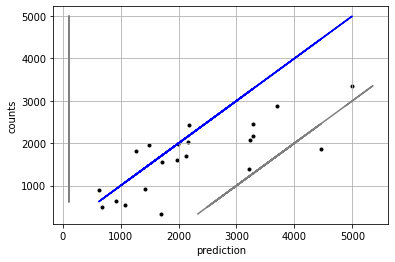

In [ ]:
plt.scatter(y1,pred1,s=9,color='k') 
plt.plot(count3['counts'],y1,color='b') 
plt.plot(count3['upper'],y,color='grey')
plt.plot(count3['lower'],y1,color='grey')  
plt.ylabel('counts') 
plt.xlabel('prediction')
plt.grid()